<h1><center> Beginners Guide to Machine Learning </center></h1>

## Dr. J. Kyle Roberts, Southern Methodist University
## Ellen Taylor, Southern Methodist University
**Annette Caldwell Simmons School of Education and Human Development**

## Outline

1. History of ML Models
2. Types of ML Models
3. Data Structures
4. Practical Example for Classification
5. Practical Example for Regression

## 1. History of ML Models

When considering the history of AI, we typically think of 7 different divisions (or applications).
- Computer vision
- Fuzzy logic
- Expert systems
- Robotics
- Machine learning
- Neural networks/deep learning
- Natural language processing

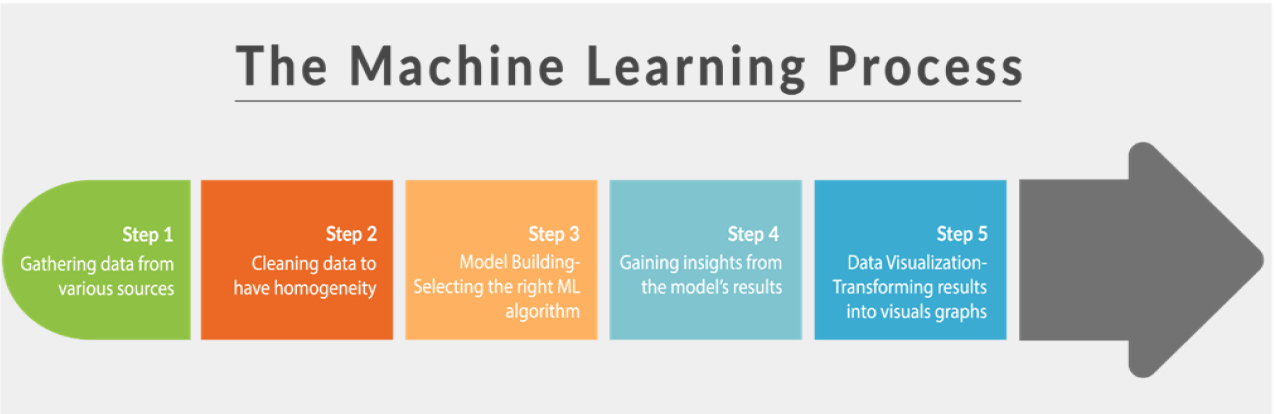

## 2. Types of ML Models

- Supervised Learning - "Train Me!"
- Unsupervised Learning - "I am self-sufficient in learning"
- Semi-supervised Learning - "Combination of the two above"
- Reinforcement Learning - "My life ... my rules!"

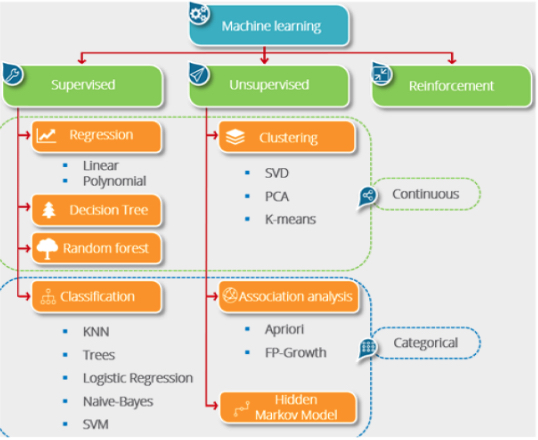

# 3. Data Structures

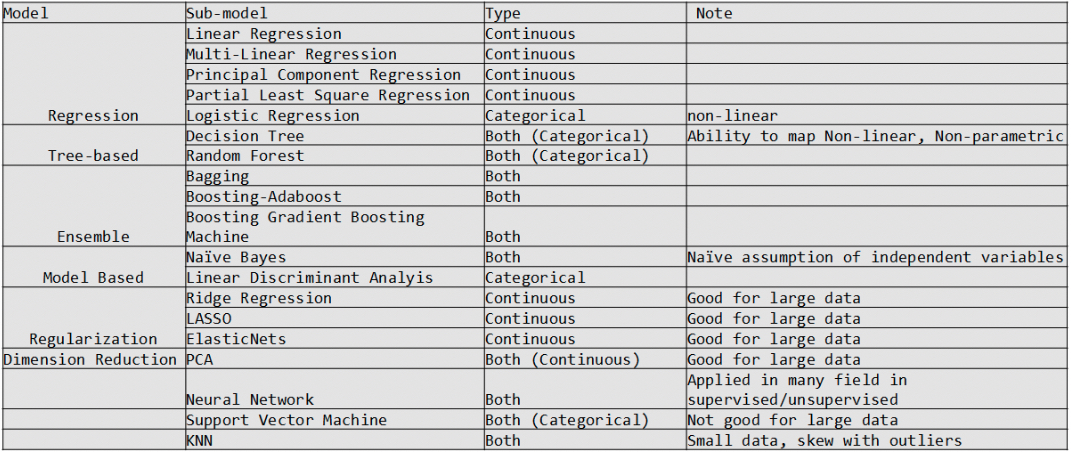

***Regularization methods are an extension of regression models that introduce a penalization term to the loss function to balance between complexity of model and improvement (good for large data).***

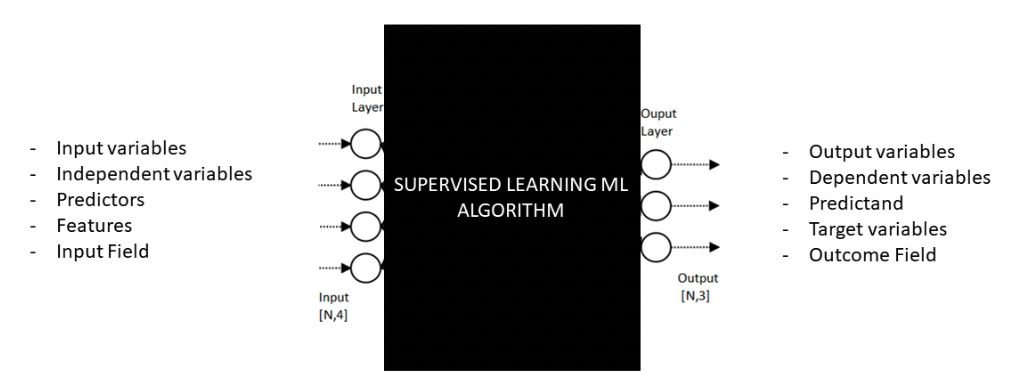

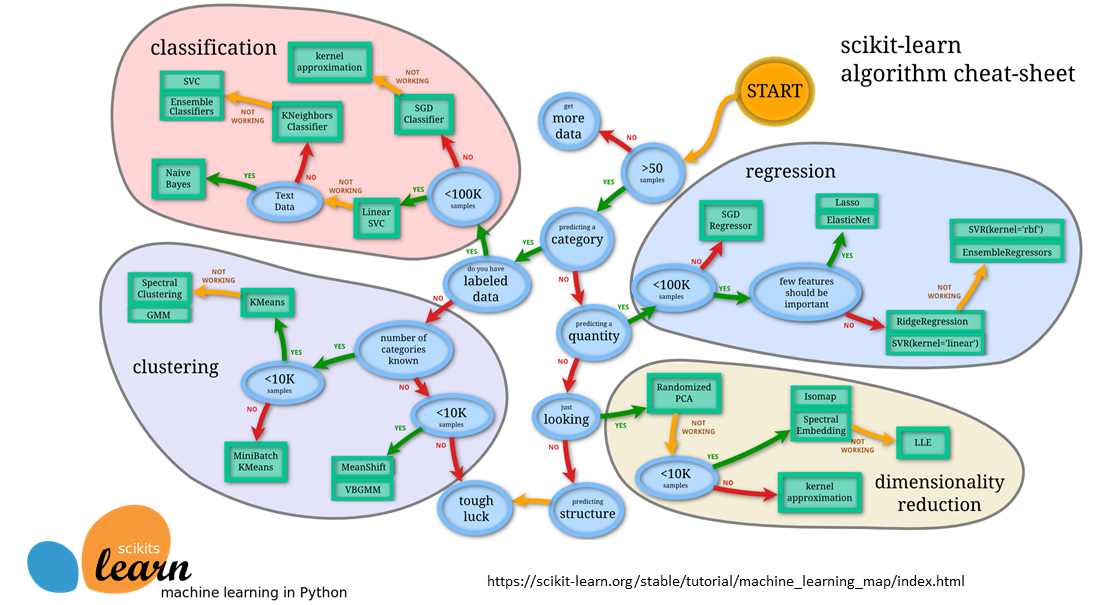

# 4. Practical Example for Classification

## Logistic Regression in sklearn

In [95]:
# Load required packages
import pandas as pd
import numpy as np

# upload Census dataset with no header (none is provided - prevents first row of data as header)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# define columns by name
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income']
df.info()

# show census column data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Defining the feature variable set and the variable to be predicted

We are going to set "income level" as the variable that we are trying to classify. First, let's look at the values we are going to predict.

In [96]:
df['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

## One-Hot Encoding of data

Because Python is expecting numeric data in the feature set for our logistic regression, we have to convert our data to numeric (or binomial)

In [97]:
# Use pd.get_dummies() to transform categorical into numerical columns
df = pd.get_dummies(df)

In [98]:
# select all columns except for last 2 for our feature set "X"
X = df.iloc[:, :-2]

# select last column to be our "y"
y = df.iloc[:, -1]

# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Running the model
Now we can run a logistic regression through the sklearn routine with the following:

In [99]:
# Import Logistic Regression and initialize model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit model to training data
model.fit(X_train, y_train)

# Score predictions
model.predict(X_test)

# Score model on test data using R^2 as the determinate metric
model.score(X_test, y_test)

0.7930293259634577

## Feature Importance

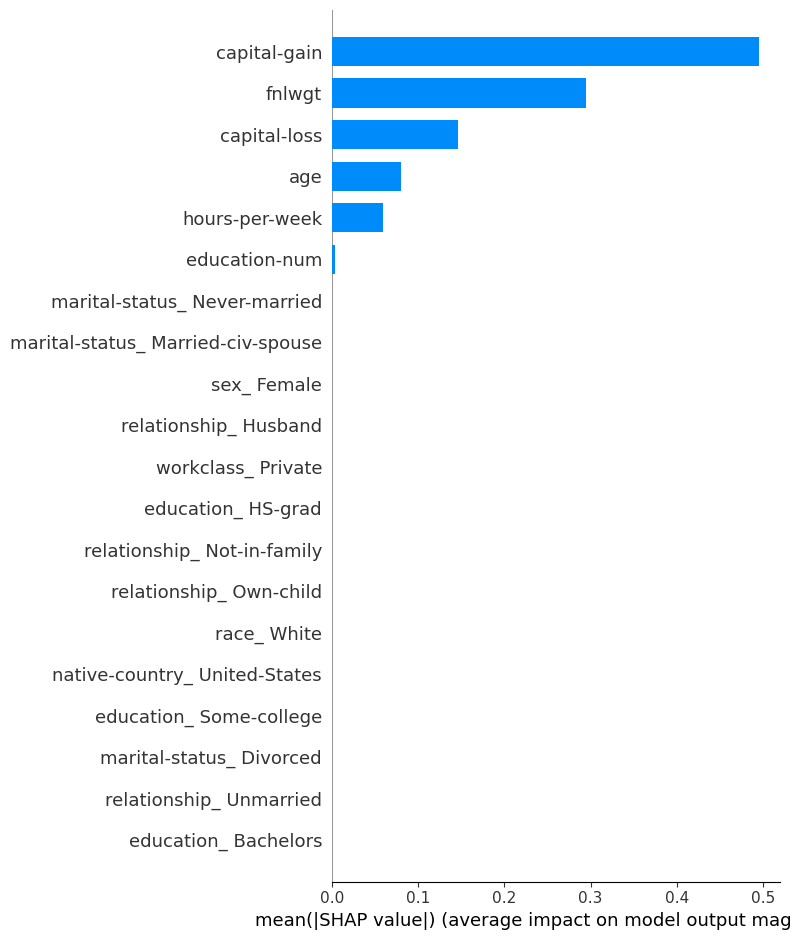

In [100]:
import shap 
feature_importance1 = shap.LinearExplainer(model, X_train)
feature_importance_val1 = feature_importance1.shap_values(X_train)
shap.summary_plot(feature_importance_val1, X_train, plot_type="bar")

# 5. Practical Example for Regression

## XGBoost Model

In [101]:
from xgboost import XGBRegressor

In [102]:
cbm = pd.read_csv('Data/easyCBM.csv')
cbm.head()

,Unnamed: 0,ID,ORF1,ORF2,ORF3,MCC1,MCC2,MCC3,VOC1,VOC3,Test_A,Ethnic,EconDs,SpEd,Gender,Prof
0,1,1,117,170,169,16,16,19,21,22,227,1,0,0,1,1
1,2,2,31,38,56,10,6,8,8,7,199,1,0,1,1,0
2,3,3,129,142,165,17,15,16,20,17,219,1,1,0,0,1
3,4,4,123,130,163,14,13,18,21,18,221,1,1,0,1,1
4,5,5,231,237,239,17,15,18,18,20,227,1,1,0,1,1


In [103]:
# select Test_A as our target
y2 = cbm["Test_A"]

# select all other variables as features
X2 = cbm[["ORF1", "ORF3", "MCC1", "MCC3", "VOC1", "VOC3", "Ethnic", "EconDs", "SpEd", "Gender"]]

# split into test and train data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [104]:
# run XGBRegressor
from xgboost import XGBRegressor

# create model
xg_reg = XGBRegressor(max_depth=3, n_estimators=1000, eta=0.02, subsample=0.75, random_state=2)

# Fit xg_reg to training set
xg_reg.fit(X2_train, y2_train)

# Predict labels of test set, y_pred
y2_pred = xg_reg.predict(X2_test)

## Evaluation Criteria

In [105]:
# Compute root mean squared error (rmse)
from sklearn.metrics import mean_squared_error as MSE
MSE(y2_test, y2_pred)**0.5

5.319265740315541

In [106]:
# Compute R^2
from sklearn import metrics
metrics.r2_score(y2_test,y2_pred)

0.71391404034589

In [107]:
# feature importance
print(xg_reg.feature_importances_)

[0.07170566 0.04994104 0.02711592 0.27428418 0.13264695 0.28540325
 0.02599462 0.03444023 0.07366675 0.02480138]


In [108]:
X2_train.head()

,ORF1,ORF3,MCC1,MCC3,VOC1,VOC3,Ethnic,EconDs,SpEd,Gender
71,101,127,9,15,13,17,4,1,0,1
160,110,142,12,18,17,18,5,0,1,0
180,172,178,17,16,19,22,5,1,0,1
75,144,136,16,15,15,20,4,1,0,0
59,146,185,17,10,13,10,4,1,0,0
